In [1]:
import pandas as pd 
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.colors as col
df_googlebooks1= pd.read_csv('google_books_1299.csv', header=0, delimiter=',')

In [2]:
df_googlebooks1.shape

(1299, 14)

In [3]:
df_googlebooks1.head()

,Unnamed: 0,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192,none,9781612626864,English,"Jul 31, 2014"
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9780758272799,English,"Jul 1, 2007"
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368,"Games &amp, Activities , Video &amp, Electronic",9781506713816,English,"Nov 5, 2019"
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320,none,9781617734076,English,"Mar 1, 2009"
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544,"Fiction , Fantasy , Dark Fantasy",9780007287758,English,"Jan 8, 2009"


In [4]:
df_googlebooks1.columns

Index(['Unnamed: 0', 'title', 'author', 'rating', 'voters', 'price',
       'currency', 'description', 'publisher', 'page_count', 'generes', 'ISBN',
       'language', 'published_date'],
      dtype='object')

In [5]:
df_googlebooks1.dtypes

Unnamed: 0          int64
title              object
author             object
rating            float64
voters             object
price             float64
currency           object
description        object
publisher          object
page_count          int64
generes            object
ISBN               object
language           object
published_date     object
dtype: object

In [6]:
df_googlebooks1.isna().sum()

Unnamed: 0         0
title              0
author             0
rating            75
voters            75
price              0
currency           0
description        3
publisher          0
page_count         0
generes            0
ISBN               0
language           0
published_date     0
dtype: int64

variables of interest: genres and ratings. first, tokenize genres. 

In [7]:
import pandas as pd
df = pd.read_csv('google_books_1299.csv')

In [8]:
df['generes']

0                                                    none
1       Fiction , Mystery &amp, Detective , Cozy , Gen...
2         Games &amp, Activities , Video &amp, Electronic
3                                                    none
4                        Fiction , Fantasy , Dark Fantasy
                              ...                        
1294                       Medical , Health Care Delivery
1295    Psychology , Cognitive Psychology &amp, Cognition
1296                                                 none
1297                                                 none
1298                       Fiction , Thrillers , Suspense
Name: generes, Length: 1299, dtype: object

In [9]:
df['generes'].apply(lambda x: x.replace(',', '').replace('&amp', '').split())
df['genres'] = df['generes'].apply(lambda x: ' '.join(x.replace(',', '').replace('&amp', '').split()))

In [10]:
def clean_up_genres(x):
    x = x.replace(',', '').replace('&amp', '')
    return x

df['genres'] = df['generes'].apply(clean_up_genres)
df['genres']

0                                              none
1        Fiction  Mystery  Detective  Cozy  General
2              Games  Activities  Video  Electronic
3                                              none
4                    Fiction  Fantasy  Dark Fantasy
                           ...                     
1294                  Medical  Health Care Delivery
1295    Psychology  Cognitive Psychology  Cognition
1296                                           none
1297                                           none
1298                   Fiction  Thrillers  Suspense
Name: genres, Length: 1299, dtype: object

In [11]:
df['genres'].describe()

count     1299
unique     242
top       none
freq       527
Name: genres, dtype: object

In [12]:
df['genres'].value_counts()

none                                                 527
Fiction  Thrillers  Suspense                          35
Fiction  Fantasy  Epic                                33
Comics  Graphic Novels  Superheroes                   30
Fiction  Mystery  Detective  General                  21
                                                    ... 
Biography  Autobiography  Science  Technology          1
Political Science  Public Affairs  Administration      1
Cooking  Holiday                                       1
Social Science  Popular Culture                        1
Medical  Health Care Delivery                          1
Name: genres, Length: 242, dtype: int64

In [13]:
s = df.apply(lambda x: pd.Series(x['genres'].split()) ,axis=1).stack().reset_index(level=1, drop=True)
s.name = 'new_g'
df = df.join(s)

df[['new_g', 'title', 'rating', 'voters', 'published_date']].head(10)

,new_g,title,rating,voters,published_date
0,none,Attack on Titan: Volume 13,4.6,428,"Jul 31, 2014"
1,Fiction,Antiques Roadkill: A Trash 'n' Treasures Mystery,3.3,23,"Jul 1, 2007"
1,Mystery,Antiques Roadkill: A Trash 'n' Treasures Mystery,3.3,23,"Jul 1, 2007"
1,Detective,Antiques Roadkill: A Trash 'n' Treasures Mystery,3.3,23,"Jul 1, 2007"
1,Cozy,Antiques Roadkill: A Trash 'n' Treasures Mystery,3.3,23,"Jul 1, 2007"
1,General,Antiques Roadkill: A Trash 'n' Treasures Mystery,3.3,23,"Jul 1, 2007"
2,Games,The Art of Super Mario Odyssey,3.9,9,"Nov 5, 2019"
2,Activities,The Art of Super Mario Odyssey,3.9,9,"Nov 5, 2019"
2,Video,The Art of Super Mario Odyssey,3.9,9,"Nov 5, 2019"
2,Electronic,The Art of Super Mario Odyssey,3.9,9,"Nov 5, 2019"


In [14]:
df["new_g"].value_counts()

none         528
Fiction      474
General      180
Business     129
Economics    126
            ... 
Espionage      1
Studies        1
Gender         1
Medicine       1
Delivery       1
Name: new_g, Length: 295, dtype: int64

In [15]:
df["new_g"].describe()

count     3489
unique     295
top       none
freq       528
Name: new_g, dtype: object

In [16]:
df["new_g"].shape

(3489,)

In [ ]:
df["new_g"].

<AxesSubplot:>

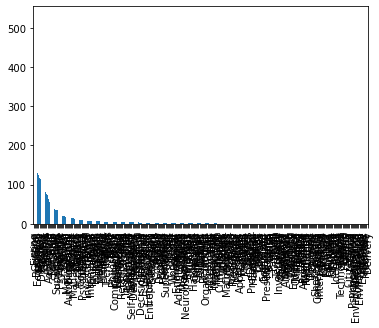

In [20]:
df["new_g"].value_counts().plot.bar()
